SVM = Support Vertor Machine = Метод опорных векторов

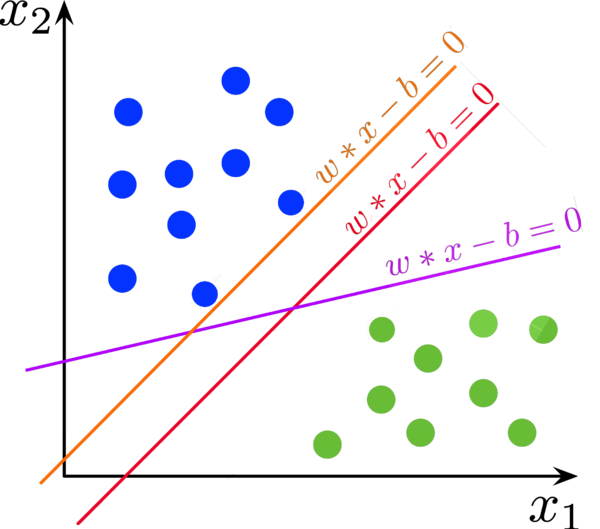

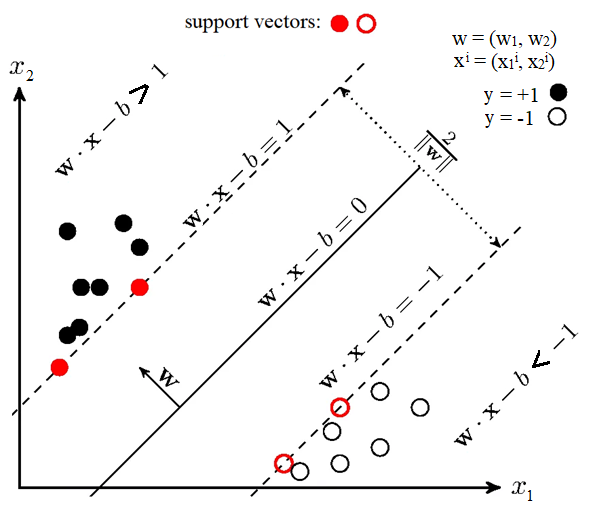

Разделяющая гиперплоскость: $w^Tx - b = 0$
    
При этом для класса "+1" $w_x - b > 0$, для класса "-1" $w^Tx - b < 0$


Ширина разделяющей полосы - проекция вектора $x_+  − x_-$ на нормаль к гиперплоскости $w$:

\begin{align} w^T(x_+  − x_-)/|w| = (w^Tx_+  − w^Tx_-)/|w| = \left((b + 1) - (b - 1)\right)/|w| = 2/|w| \rightarrow \max \end{align}

\begin{align} |w| \rightarrow \min \end{align}

\begin{align} w^Tw/2 \rightarrow \min \end{align}

Отступ $M = y(w^Tx - b)$, классификатор ошибается тогда и только тогда, когда $M<0$, объект находится на разделяющей полосе тогда и только тогда, когда $0 \le M<1$, классификатор верно классифицирует тогда и только тогда, когда $M \ge 1$

Метод опорных векторов с жестким зазором (запрещено попадание на разделяющую полосу):

\begin{aligned}  w^Tw/2 \rightarrow \min \\
y(w^Tx - b) \ge 1 \end{aligned}


Штраф за $M<0$:
\begin{aligned} Penalty = \sum_i{\max(0, 1 - M_i)} \end{aligned}

Функция потерь:
\begin{aligned} Q = \sum_i{\max(0, 1 - M_i)} + \lambda w^Tw/2 \end{aligned}

Пересчет весов:
\begin{aligned} \nabla Q &= \lambda w - yx,\space при \space yw^Tx  < 1 \\
\nabla Q &=  \lambda w,\space при \space yw^Tx \ge 1\end{aligned}


SVM ищет оптимальную разделяющую гиперплоскость, максимизируя отступ и минимизируя ошибки классификации с помощью функции потерь и регуляризации.

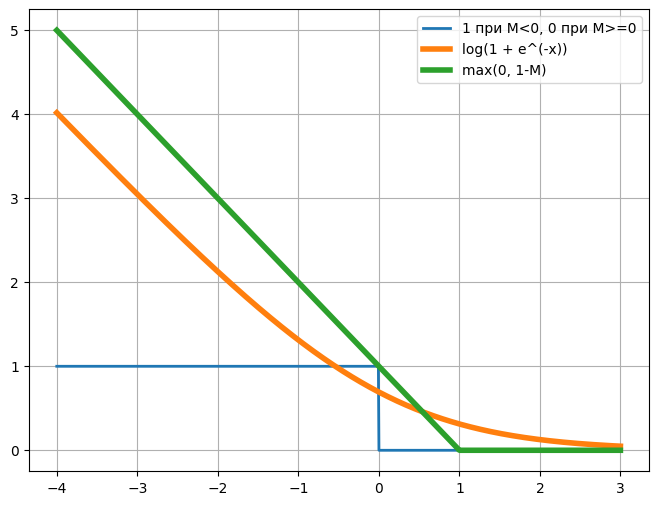

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = (8, 6)
xx = np.linspace (-4, 3, 1000)
plt.plot(xx, [(x<0).astype(int) for x in xx], linewidth = 2, label = '1 при M<0, 0 при M>=0')
plt.plot(xx, [np.log(1 + np.exp(-x)) for x in xx], linewidth = 4, label = 'log(1 + e^(-x))')
plt.plot(xx, [np.max(np.array([0, 1-x])) for x in xx], linewidth = 4, label = 'max(0, 1-M)')
plt.grid()
plt.legend()

In [307]:
def add_intercept(a):
    a_ext = np.zeros((a.shape[0], a.shape[1]+1))
    a_ext[:, 0] = float(1)
    a_ext[:, 1:] = a
    return a_ext

class SVMClassification(object):
    def __init__(self, learning_rate = 0.01, lam = 0.1, max_iter = 200):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.lam = lam
        self.w = None
        self.history_w = []
        self.errors = None
        self.loss = None

    def predict(self, X:np.array) -> np.array:
        return np.sign(self.w @ X)

    def hinge_loss(self, x, y):
        return max(0, 1 - y*(x@self.w))

    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x, y) + self.lam*(self.w @ self.w)

    def fit(self, X, Y, verbose = False):
        X = add_intercept(X)
        self.w = np.random.normal(loc=0, scale=0.05, size=X.shape[1])
        self.history_w.append(self.w)
        errors = []
        loss_epoch = []

        for epoch in range(self.max_iter):
            err = 0
            loss = 0
            for i, x in enumerate(X):
                margin = Y[i]*(self.w @ X[i])
                if margin >= 1: # классифицируем верно
                    self.w -= self.learning_rate*self.lam*self.w/self.max_iter
                    loss += self.soft_margin_loss(X[i],Y[i])
                else: # классифицируем неверно или попадаем на полосу разделения при 0<m<1
                    self.w += self.learning_rate*(Y[i]*X[i] - self.lam*self.w/self.max_iter)
                    err += 1
                    loss += self.soft_margin_loss(X[i],Y[i])
                self.history_w.append(self.w)
            if verbose and epoch % 100 ==0:
                print('epoch {}. Errors={}. Mean Hinge_loss={}'.format(epoch, round(err / len(X),3),loss))
            errors.append(err)
            loss_epoch.append(loss)
        self.history_w = np.array(self.history_w)
        self.errors = np.array(errors)
        self.loss = np.array(loss_epoch)

epoch 0. Errors=0.55. Mean Hinge_loss=[10.00514153]
epoch 100. Errors=0.5. Mean Hinge_loss=[10.00513742]
[11 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10]
[0.0334501  0.20414697]


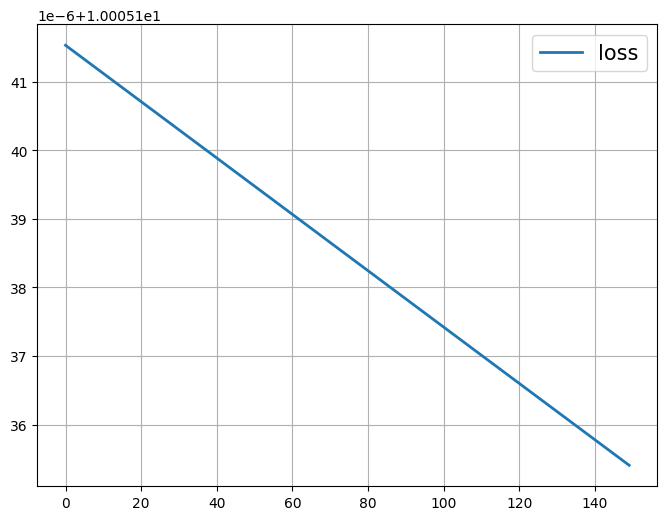

In [308]:
X = np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]).reshape(20,1)
Y = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]).reshape(20,1)
svm = SVMClassification(learning_rate=0.005, lam=0.006, max_iter=150)
svm.fit(X, Y, verbose = True)

print(svm.errors)
print(svm.w)

plt.plot(svm.loss, linewidth=2, label='loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

In [309]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
Y = iris.target

pca = PCA(n_components = 2)  # преобразование данных
X = pca.fit_transform(X)
Y[Y == 0] = -1
Y[Y > 0] = 1

epoch 0. Errors=0.587. Mean Hinge_loss=49.88729951113363
epoch 100. Errors=0.013. Mean Hinge_loss=3.0709091478009363
[88 46 31 22 15 13 11 10 10 10  7  7  6  7  7  6  7  7  6  7  4  4  4  4
  3  2  3  3  2  3  3  2  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2
  1  2  1  2  1  1  2  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2  1
  2  1  2  1  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2  1  2  1  2
  1  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2
  1  2  1  2  1  1  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2  0  0  0
  0  0  0  0  0  0]
[ 1.38050366  1.11295831 -0.83114941]


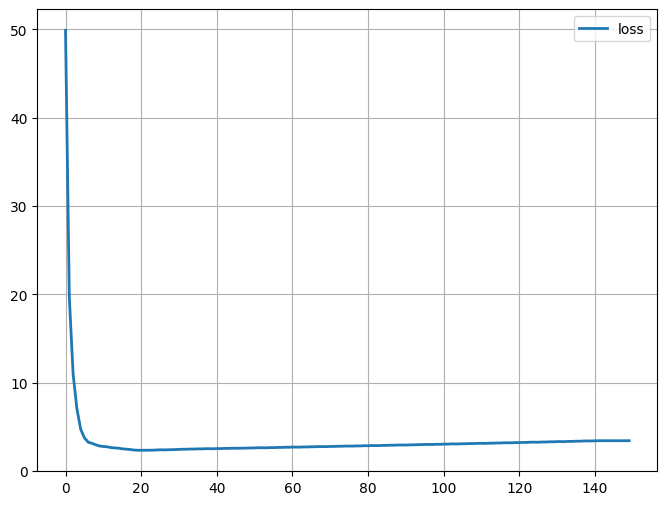

In [310]:
np.random.seed(123)
svm = SVMClassification(learning_rate = 0.005, lam = 0.006, max_iter = 150)
svm.fit(X, Y, verbose = True)
print(svm.errors)
print(svm.w)

plt.plot(svm.loss, linewidth = 2, label = 'loss')
plt.grid()
plt.legend()
plt.show()

####**Реализовать классификацию методом svm для набора данных  German Credit Cards UCI.csv**

In [311]:
# Подключаемся с google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [312]:
# Загружаем файл CSV в DataFrame
data = pd.read_csv("/content/drive/MyDrive/ОЗМО/German Credit Cards UCI.csv")
data

,Customer ID,Checking Account Status,Loan Duration (Months),Credit History,Purpose,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Personal Status and Gender,...,Property,Age (Years),Other Credits,Home Ownership,Number of Existing Credits at This Bank,Job Category,Number of Dependents,Telephone,Foreign Worker Status,Loan Status
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,fully paid
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,charged off
2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,fully paid
3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,fully paid
4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,charged off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,3130615,none,12,current loans paid,radio/television,804,< 100 DM,>= 7 years,4,male-single,...,car or other,38,none,own,1,skilled,1,none,yes,fully paid
1010,6267789,< 0 DM,45,current loans paid,radio/television,1845,< 100 DM,1 - 4 years,4,male-single,...,unknown-none,23,none,for free,1,skilled,1,yes,yes,charged off
1011,6959896,0 - 200 DM,45,critical account - other non-bank loans,car (used),4576,100 - 500 DM,unemployed,3,male-single,...,car or other,27,none,own,1,skilled,1,none,yes,fully paid
1012,1099632,none,48,critical account - other non-bank loans,business,7629,unknown/none,>= 7 years,4,male-divorced/separated,...,car or other,46,bank,own,2,highly skilled,2,none,yes,fully paid


In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Customer ID                                          1014 non-null   int64 
 1   Checking Account Status                              1014 non-null   object
 2   Loan Duration (Months)                               1014 non-null   int64 
 3   Credit History                                       1014 non-null   object
 4   Purpose                                              1014 non-null   object
 5   Loan Amount                                          1014 non-null   int64 
 6   Savings Account Balance                              1014 non-null   object
 7   Present Employment Time (Years)                      1014 non-null   object
 8   Installment Rate in Percentage of Disposable Income  1014 non-null   int64 
 9

In [314]:
# удадяем неинформативные колонки Customer ID и Telephone

data = data.drop(columns = ['Customer ID', 'Telephone'], axis = 1)
data

,Checking Account Status,Loan Duration (Months),Credit History,Purpose,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Personal Status and Gender,Other Debtors / Guarantors,Present Residence Time (Years),Property,Age (Years),Other Credits,Home Ownership,Number of Existing Credits at This Bank,Job Category,Number of Dependents,Foreign Worker Status,Loan Status
0,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,none,4,real estate,67,none,own,2,skilled,1,yes,fully paid
1,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,2,real estate,22,none,own,1,skilled,1,yes,charged off
2,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,none,3,real estate,49,none,own,1,unskilled-resident,2,yes,fully paid
3,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,guarantor,4,building society savings/life insurance,45,none,for free,1,skilled,2,yes,fully paid
4,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,none,4,unknown-none,53,none,for free,2,skilled,2,yes,charged off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,none,12,current loans paid,radio/television,804,< 100 DM,>= 7 years,4,male-single,none,4,car or other,38,none,own,1,skilled,1,yes,fully paid
1010,< 0 DM,45,current loans paid,radio/television,1845,< 100 DM,1 - 4 years,4,male-single,none,4,unknown-none,23,none,for free,1,skilled,1,yes,charged off
1011,0 - 200 DM,45,critical account - other non-bank loans,car (used),4576,100 - 500 DM,unemployed,3,male-single,none,4,car or other,27,none,own,1,skilled,1,yes,fully paid
1012,none,48,critical account - other non-bank loans,business,7629,unknown/none,>= 7 years,4,male-divorced/separated,none,2,car or other,46,bank,own,2,highly skilled,2,yes,fully paid


(array([711.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 303.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

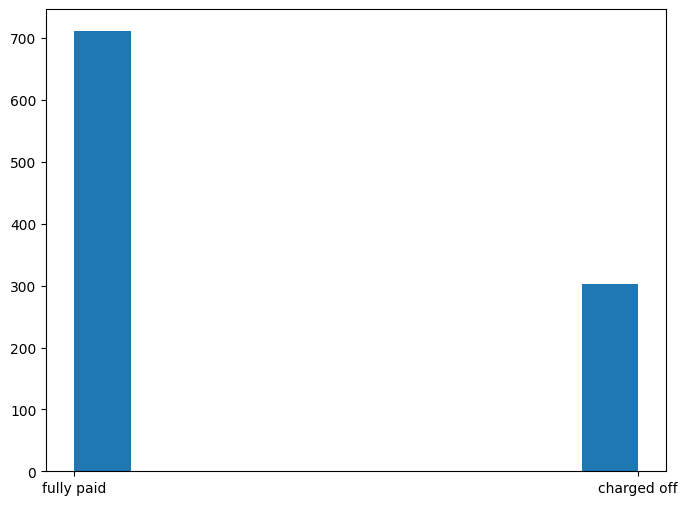

In [315]:
# соотношение классов: видим дисбаланс

plt.hist(data['Loan Status'])

####**Предобработка данных**

#####**Кодирование ранжируемых и бинарных признаков**

In [316]:
for column in data.columns:
  if data.dtypes[column] == 'O':
    print(f'Уникальные значения для колонки "{column}":')
    print(data[column].unique())
    print("\n\n")

Уникальные значения для колонки "Checking Account Status":
['< 0 DM' '0 - 200 DM' 'none' '> 200 DM or salary assignment']



Уникальные значения для колонки "Credit History":
['critical account - other non-bank loans' 'current loans paid'
 'past payment delays' 'no credit - paid' 'all loans at bank paid']



Уникальные значения для колонки "Purpose":
['radio/television' 'education' 'furniture/equipment' 'car (new)'
 'car (used)' 'business' 'domestic appliances' 'repairs' 'other'
 'retraining']



Уникальные значения для колонки "Savings Account Balance":
['unknown/none' '< 100 DM' '500 - 1000 DM' '>= 1000 DM' '100 - 500 DM']



Уникальные значения для колонки "Present Employment Time (Years)":
['>= 7 years' '1 - 4 years' '4 - 7 years' 'unemployed' '< 1 year']



Уникальные значения для колонки "Personal Status and Gender":
['male-single' 'female-divorced/separated/married'
 'male-divorced/separated' 'male-married/widowed']



Уникальные значения для колонки "Other Debtors / Guarantors"

In [317]:
# ранжируемые признаки

job_enc = {
    'highly skilled' : 3,
    'skilled' : 2,
    'unskilled-resident': 1,
    'unemployed-unskilled-non-resident' : 0
}

checking_acc_enc = {
    '< 0 DM': 0,
    '0 - 200 DM' : 1,
    'none' : -1,
    '> 200 DM or salary assignment' :2

}

credit_history_enc = {
    'critical account - other non-bank loans' : 0,
    'current loans paid': 3,
    'past payment delays': 1,
    'no credit - paid': 2,
    'all loans at bank paid' :4
}

saving_acc_enc = {
    'unknown/none' : -1,
    '< 100 DM' : 0,
    '500 - 1000 DM': 2,
    '>= 1000 DM': 3,
    '100 - 500 DM' : 1
}

present_employ_enc = {
    '>= 7 years': 4,
    '1 - 4 years' : 2,
    '4 - 7 years' : 3,
    'unemployed' : -1,
    '< 1 year' : 0
}

home_owner_enc = {
    'own' : 2,
    'for free': 1,
    'rent': 0
}

other_credits_enc = {
    'none': 0,
    'bank':2,
    'stores': 1
}

debtors_enc = {
    'none' : 0,
    'guarantor': 2,
    'co-applicant' : 1
}


range_enc = {
    'Checking Account Status' : checking_acc_enc,
    'Credit History' : credit_history_enc,
    'Savings Account Balance' : saving_acc_enc,
    'Present Employment Time (Years)': present_employ_enc,
    'Home Ownership': home_owner_enc,
    'Job Category': job_enc,
    'Other Credits' : other_credits_enc,
     'Other Debtors / Guarantors' : debtors_enc
}

In [318]:
# бинарные призаки

binary_enc = {
    'Foreign Worker Status' : {
        'yes': 1,
        'no' : 0
    },

  'Loan Status':
    {
        'fully paid' : 1,
        'charged off':-1
    }
}

In [319]:
for column in data.columns:
  if column in range_enc.keys():
    data[column] = data[column].apply(lambda x: range_enc[column][x])
  elif column in binary_enc.keys() :
    data[column] = data[column].apply(lambda x: binary_enc[column][x])

data

,Checking Account Status,Loan Duration (Months),Credit History,Purpose,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Personal Status and Gender,Other Debtors / Guarantors,Present Residence Time (Years),Property,Age (Years),Other Credits,Home Ownership,Number of Existing Credits at This Bank,Job Category,Number of Dependents,Foreign Worker Status,Loan Status
0,0,6,0,radio/television,1169,-1,4,4,male-single,0,4,real estate,67,0,2,2,2,1,1,1
1,1,48,3,radio/television,5951,0,2,2,female-divorced/separated/married,0,2,real estate,22,0,2,1,2,1,1,-1
2,-1,12,0,education,2096,0,3,2,male-single,0,3,real estate,49,0,2,1,1,2,1,1
3,0,42,3,furniture/equipment,7882,0,3,2,male-single,2,4,building society savings/life insurance,45,0,1,1,2,2,1,1
4,0,24,1,car (new),4870,0,2,3,male-single,0,4,unknown-none,53,0,1,2,2,2,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,-1,12,3,radio/television,804,0,4,4,male-single,0,4,car or other,38,0,2,1,2,1,1,1
1010,0,45,3,radio/television,1845,0,2,4,male-single,0,4,unknown-none,23,0,1,1,2,1,1,-1
1011,1,45,0,car (used),4576,1,-1,3,male-single,0,4,car or other,27,0,2,1,2,1,1,1
1012,-1,48,0,business,7629,-1,4,4,male-divorced/separated,0,2,car or other,46,2,2,2,3,2,1,1


#####**One-Hot encoder остальных признаков**

In [320]:
def OHE(df, column):
  new_df = df.copy()
  unique_values = df[column].unique()

  for value in unique_values:
    new_column_name = f"{column}_{value}"
    new_df[new_column_name] = (df[column] == value).astype(int)
  new_df = new_df.drop(columns=column)

  new_df = new_df.drop(columns = new_column_name)

  return new_df

In [321]:
ohe_columns = [
    'Purpose',
    'Personal Status and Gender',
    'Property'
]
for column in ohe_columns:
  data = OHE(data, column)

data

,Checking Account Status,Loan Duration (Months),Credit History,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Other Debtors / Guarantors,Present Residence Time (Years),Age (Years),...,Purpose_business,Purpose_domestic appliances,Purpose_repairs,Purpose_other,Personal Status and Gender_male-single,Personal Status and Gender_female-divorced/separated/married,Personal Status and Gender_male-divorced/separated,Property_real estate,Property_building society savings/life insurance,Property_unknown-none
0,0,6,0,1169,-1,4,4,0,4,67,...,0,0,0,0,1,0,0,1,0,0
1,1,48,3,5951,0,2,2,0,2,22,...,0,0,0,0,0,1,0,1,0,0
2,-1,12,0,2096,0,3,2,0,3,49,...,0,0,0,0,1,0,0,1,0,0
3,0,42,3,7882,0,3,2,2,4,45,...,0,0,0,0,1,0,0,0,1,0
4,0,24,1,4870,0,2,3,0,4,53,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,-1,12,3,804,0,4,4,0,4,38,...,0,0,0,0,1,0,0,0,0,0
1010,0,45,3,1845,0,2,4,0,4,23,...,0,0,0,0,1,0,0,0,0,1
1011,1,45,0,4576,1,-1,3,0,4,27,...,0,0,0,0,1,0,0,0,0,0
1012,-1,48,0,7629,-1,4,4,0,2,46,...,1,0,0,0,0,0,1,0,0,0


In [322]:
data.dtypes

Checking Account Status                                         int64
Loan Duration (Months)                                          int64
Credit History                                                  int64
Loan Amount                                                     int64
Savings Account Balance                                         int64
Present Employment Time (Years)                                 int64
Installment Rate in Percentage of Disposable Income             int64
Other Debtors / Guarantors                                      int64
Present Residence Time (Years)                                  int64
Age (Years)                                                     int64
Other Credits                                                   int64
Home Ownership                                                  int64
Number of Existing Credits at This Bank                         int64
Job Category                                                    int64
Number of Dependents

#### **Разделение на тренировочную и тестовую выборки**

In [323]:
from sklearn.model_selection import train_test_split

In [324]:
y = np.array (data['Loan Status']).reshape(-1, 1)
x = np.array(data.drop('Loan Status', axis = 1))

In [325]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)

In [326]:
x_train,  x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### **Обучение модели на неотшкалированных данных**

In [327]:
totals = []
current_res = {'name': 'none', 'lr':0, 'lambda':0, 'max_iter':0, 'train_errors': 0, 'test_errors': 0}

epoch 0. Errors=0.444. Mean Hinge_loss=[665787.93569593]
epoch 100. Errors=0.402. Mean Hinge_loss=[615140.6356309]
epoch 200. Errors=0.398. Mean Hinge_loss=[571567.40586847]
epoch 300. Errors=0.411. Mean Hinge_loss=[554442.42150142]
epoch 400. Errors=0.39. Mean Hinge_loss=[498791.75940396]
epoch 500. Errors=0.398. Mean Hinge_loss=[504605.52956315]
epoch 600. Errors=0.382. Mean Hinge_loss=[524842.20452372]
epoch 700. Errors=0.412. Mean Hinge_loss=[595609.83358095]
epoch 800. Errors=0.402. Mean Hinge_loss=[570704.75935793]
epoch 900. Errors=0.406. Mean Hinge_loss=[597051.40609783]


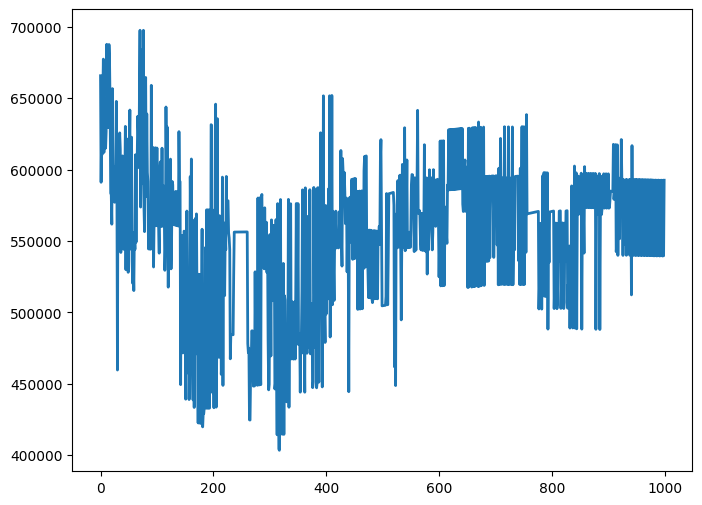

In [328]:
svm = SVMClassification(learning_rate=0.0005, lam=0.001, max_iter=1000)
svm.fit(x_train, y_train, verbose = True)

totals.append(
    {'name': 'SVM not-scaled data',
     'lr':0.0005,
     'lambda':0.001,
     'max_iter': 1000,
     'train_errors': svm.errors[-1]
     })

plt.plot(svm.loss, linewidth=2, label='loss')

#### **Обучение с мин-макс стандартизацией**

In [329]:
x = data.drop('Loan Status', axis = 1)

In [330]:
class minMaxScaler():
  def __init__(self):
    self.max = 0
    self.min = 0

  def fit(self, x):
    self.max = x.max()
    self.min = x.min()

  def transform(self, x):
    return (x - self.min) / (self.max - self.min)

  def fit_transform(self, x):
    self.fit(x)
    return self.transform(x)

In [331]:
scale = minMaxScaler()
scale.fit_transform(x['Age (Years)'])

0       0.857143
1       0.053571
2       0.535714
3       0.464286
4       0.607143
          ...   
1009    0.339286
1010    0.071429
1011    0.142857
1012    0.482143
1013    0.125000
Name: Age (Years), Length: 1014, dtype: float64

In [332]:
minmax = minMaxScaler()

In [333]:
x_scaled  = x.copy()

for column in x.columns:
  if 'Purpose' not in column and 'Personal Status' not in column and 'Property' not in column and column != 'Foreign Worker Status':
    x_scaled[column] = minmax.fit_transform(np.array(x_scaled[column]).reshape((-1, 1)))

In [334]:
x_scaled

,Checking Account Status,Loan Duration (Months),Credit History,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Other Debtors / Guarantors,Present Residence Time (Years),Age (Years),...,Purpose_business,Purpose_domestic appliances,Purpose_repairs,Purpose_other,Personal Status and Gender_male-single,Personal Status and Gender_female-divorced/separated/married,Personal Status and Gender_male-divorced/separated,Property_real estate,Property_building society savings/life insurance,Property_unknown-none
0,0.333333,0.029412,0.00,0.050567,0.00,1.0,1.000000,0.0,1.000000,0.857143,...,0,0,0,0,1,0,0,1,0,0
1,0.666667,0.647059,0.75,0.313690,0.25,0.6,0.333333,0.0,0.333333,0.053571,...,0,0,0,0,0,1,0,1,0,0
2,0.000000,0.117647,0.00,0.101574,0.25,0.8,0.333333,0.0,0.666667,0.535714,...,0,0,0,0,1,0,0,1,0,0
3,0.333333,0.558824,0.75,0.419941,0.25,0.8,0.333333,1.0,1.000000,0.464286,...,0,0,0,0,1,0,0,0,1,0
4,0.333333,0.294118,0.25,0.254209,0.25,0.6,0.666667,0.0,1.000000,0.607143,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.000000,0.117647,0.75,0.030483,0.25,1.0,1.000000,0.0,1.000000,0.339286,...,0,0,0,0,1,0,0,0,0,0
1010,0.333333,0.602941,0.75,0.087763,0.25,0.6,1.000000,0.0,1.000000,0.071429,...,0,0,0,0,1,0,0,0,0,1
1011,0.666667,0.602941,0.00,0.238032,0.50,0.0,0.666667,0.0,1.000000,0.142857,...,0,0,0,0,1,0,0,0,0,0
1012,0.000000,0.647059,0.00,0.406020,0.00,1.0,1.000000,0.0,0.333333,0.482143,...,1,0,0,0,0,0,1,0,0,0


In [335]:
x_scaled = np.array(x_scaled)

In [336]:
x_scaled_train,  x_scaled_test, y_sc_train,y_sc_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

epoch 0. Errors=0.998. Mean Hinge_loss=[702.85270127]
epoch 100. Errors=0.614. Mean Hinge_loss=[487.12865719]
epoch 200. Errors=0.61. Mean Hinge_loss=[483.2479562]
epoch 300. Errors=0.61. Mean Hinge_loss=[480.25909783]
epoch 400. Errors=0.61. Mean Hinge_loss=[477.71061918]
epoch 500. Errors=0.6. Mean Hinge_loss=[476.54648022]
epoch 600. Errors=0.593. Mean Hinge_loss=[476.12830889]
epoch 700. Errors=0.593. Mean Hinge_loss=[476.20874853]
epoch 800. Errors=0.591. Mean Hinge_loss=[476.38757254]
epoch 900. Errors=0.589. Mean Hinge_loss=[476.64239067]


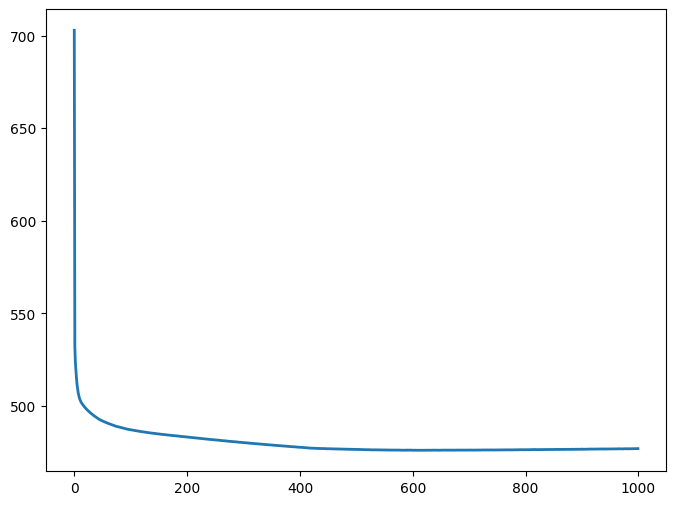

In [337]:
svm = SVMClassification(learning_rate=0.0005, lam=0.001, max_iter=1000)
svm.fit(x_scaled_train, y_sc_train, verbose = True)
totals.append(
    {'name': 'SVM minmax-scaled data',
     'lr': 0.0005,
     'lambda': 0.001,
     'max_iter': 1000,
     'train_errors': svm.errors[-1]
     })
plt.plot(svm.loss, linewidth=2, label='loss')

#### **Обучение со StandardScaler**

In [338]:
class standardScaler():

  def __init__(self):
    self.mean = 0
    self.std = 0

  def fit(self, x):
    self.mean = x.mean()
    self.std = x.std()

  def transform(self, x):
    return (x  - self.mean) / (self.std )

  def fit_transform(self, x):
    self.fit(x)
    return self.transform(x)

In [339]:
standard = standardScaler()

In [340]:
x_standard = x.copy()

for column in x.columns:
  if 'Purpose' not in column and 'Personal Status' not in column and 'Property' not in column and column != 'Foreign Worker Status':
    x_standard[column] = standard.fit_transform(np.array(x_standard[column]).reshape((-1, 1)))

In [341]:
x_standard

,Checking Account Status,Loan Duration (Months),Credit History,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Other Debtors / Guarantors,Present Residence Time (Years),Age (Years),...,Purpose_business,Purpose_domestic appliances,Purpose_repairs,Purpose_other,Personal Status and Gender_male-single,Personal Status and Gender_female-divorced/separated/married,Personal Status and Gender_male-divorced/separated,Property_real estate,Property_building society savings/life insurance,Property_unknown-none
0,-0.002060,-1.234683,-1.392734,-0.745952,-1.231741,1.195283,0.920845,-0.307044,1.048956,2.759041,...,0,0,0,0,1,0,0,1,0,0
1,1.042128,2.243927,0.739474,0.947020,-0.192652,-0.094783,-0.866211,-0.307044,-0.761498,-1.193087,...,0,0,0,0,0,1,0,1,0,0
2,-1.046247,-0.737738,-1.392734,-0.417766,-0.192652,0.550250,-0.866211,-0.307044,0.143729,1.178190,...,0,0,0,0,1,0,0,1,0,0
3,-0.002060,1.746983,0.739474,1.630652,-0.192652,0.550250,-0.866211,3.816704,1.048956,0.826890,...,0,0,0,0,1,0,0,0,1,0
4,-0.002060,0.256150,-0.681998,0.564314,-0.192652,-0.094783,0.027317,-0.307044,1.048956,1.529490,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,-1.046247,-0.737738,0.739474,-0.875173,-0.192652,1.195283,0.920845,-0.307044,1.048956,0.212114,...,0,0,0,0,1,0,0,0,0,0
1010,-0.002060,1.995455,0.739474,-0.506628,-0.192652,-0.094783,0.920845,-0.307044,1.048956,-1.105262,...,0,0,0,0,1,0,0,0,0,1
1011,1.042128,1.995455,-1.392734,0.460229,0.846438,-2.029881,0.027317,-0.307044,1.048956,-0.753962,...,0,0,0,0,1,0,0,0,0,0
1012,-1.046247,2.243927,-1.392734,1.541083,-1.231741,1.195283,0.920845,-0.307044,-0.761498,0.914715,...,1,0,0,0,0,0,1,0,0,0


In [342]:
x_standard = np.array(x_standard)

In [343]:
x_standard_train, x_standard_test, y_st_train, y_st_test = train_test_split(x_standard, y, test_size=0.2, random_state=42)

epoch 0. Errors=0.999. Mean Hinge_loss=[689.23451116]
epoch 100. Errors=0.596. Mean Hinge_loss=[471.28258515]
epoch 200. Errors=0.592. Mean Hinge_loss=[468.01679462]
epoch 300. Errors=0.581. Mean Hinge_loss=[467.38967999]
epoch 400. Errors=0.581. Mean Hinge_loss=[467.06773055]
epoch 500. Errors=0.58. Mean Hinge_loss=[466.99393629]
epoch 600. Errors=0.578. Mean Hinge_loss=[467.01475751]
epoch 700. Errors=0.578. Mean Hinge_loss=[467.0476419]
epoch 800. Errors=0.573. Mean Hinge_loss=[467.04631588]
epoch 900. Errors=0.576. Mean Hinge_loss=[467.1112718]


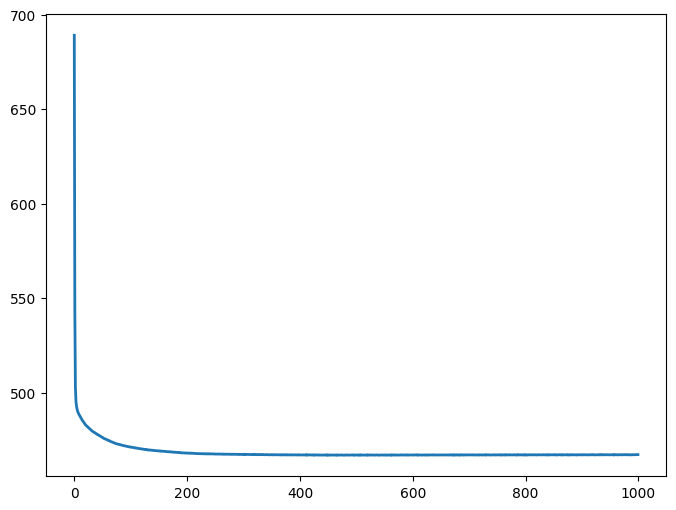

In [344]:
svm = SVMClassification(learning_rate=0.0005, lam=0.001, max_iter=1000)
svm.fit(x_standard_train, y_st_train, verbose = True)
totals.append(
    {'name': 'SVM normalized data',
     'lr':0.0005,
     'lambda':0.001,
     'max_iter':1000,
     'train_errors': svm.errors[-1]
     })
plt.plot(svm.loss, linewidth=2, label='loss')

#### **Балансировка классов**

In [345]:
from imblearn.under_sampling import NearMiss

epoch 0. Errors=0.038. Mean Hinge_loss=410.6806676265955
epoch 100. Errors=0.012. Mean Hinge_loss=5.528993705125477
epoch 200. Errors=0.008. Mean Hinge_loss=6.594239058682731
epoch 300. Errors=0.01. Mean Hinge_loss=7.24250666212853
epoch 400. Errors=0.01. Mean Hinge_loss=6.097060450572849
epoch 500. Errors=0.01. Mean Hinge_loss=6.361600744374439
epoch 600. Errors=0.01. Mean Hinge_loss=8.551960201165402
epoch 700. Errors=0.01. Mean Hinge_loss=9.73441775569488
epoch 800. Errors=0.01. Mean Hinge_loss=10.303001017651008
epoch 900. Errors=0.015. Mean Hinge_loss=11.382248926907423


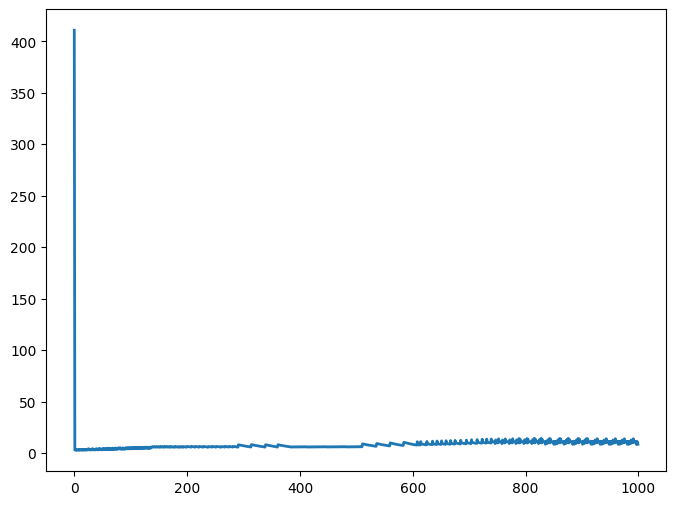

In [346]:
nm = NearMiss()
X_res, y_res = nm.fit_resample(x, y)

svm = SVMClassification(learning_rate=0.000001, lam=0.0001, max_iter=1000)
svm.fit(X_res, y_res, verbose = True)
totals.append(
    {'name': 'SVM NearMiss',
     'lr':0.000001,
     'lambda':0.0001,
     'max_iter':1000,
     'train_errors': svm.errors[-1]
     })
plt.plot(svm.loss, linewidth=2, label='loss')

epoch 0. Errors=0.059. Mean Hinge_loss=3009.747353281936
epoch 100. Errors=0.018. Mean Hinge_loss=10.352505559284824
epoch 200. Errors=0.013. Mean Hinge_loss=10.165946047927662
epoch 300. Errors=0.013. Mean Hinge_loss=10.244114887466887
epoch 400. Errors=0.018. Mean Hinge_loss=10.465384997724529
epoch 500. Errors=0.013. Mean Hinge_loss=10.22706064743472
epoch 600. Errors=0.018. Mean Hinge_loss=10.45979874566663
epoch 700. Errors=0.013. Mean Hinge_loss=10.241590687802713
epoch 800. Errors=0.018. Mean Hinge_loss=10.946987952481058
epoch 900. Errors=0.013. Mean Hinge_loss=10.224537856090011


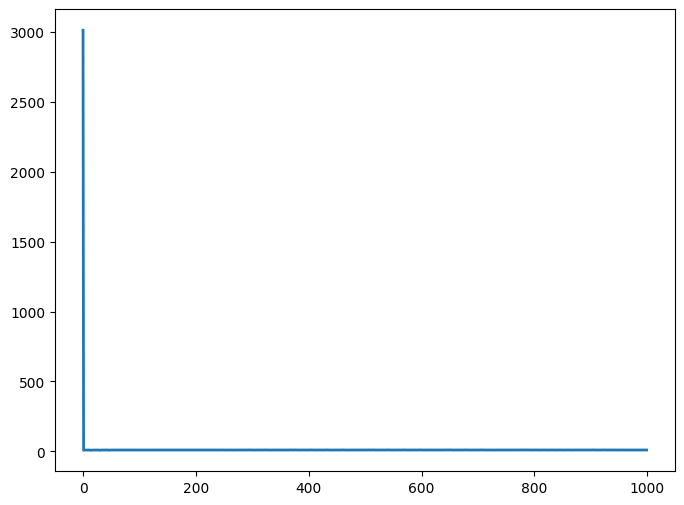

In [350]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(x, y)

svm = SVMClassification(learning_rate=0.000001, lam=0.0001, max_iter=1000)
svm.fit(X_res, y_res, verbose=True)

totals.append({
    'name': 'SVM RandomUnderSampler undersample data',
    'lr': 0.000001,
    'lambda': 0.0001,
    'max_iter': 1000,
    'train_errors': svm.errors[-1]
})

plt.plot(svm.loss, linewidth=2, label='loss')

# Итоги

In [351]:
res = pd.DataFrame(totals)

In [356]:
res

,name,lr,lambda,max_iter,train_errors
0,SVM not-scaled data,0.000500,0.0010,1000,325
1,SVM minmax-scaled data,0.000500,0.0010,1000,478
2,SVM normalized data,0.000500,0.0010,1000,468
3,SVM NearMiss,0.000001,0.0001,1000,9
4,SVM RandomUnderSampler undersample data,0.000001,0.0001,1000,8


**Мы столкнулись с линейно-неразделимыми и несбалансированными данными, что представляло вызов при обучении модели. В таких условиях использование методов сэмплирования данных, таких как NearMiss и RandomUnderSampler, оказалось крайне полезным. Эти методы помогли улучшить производительность модели, уменьшив ошибку классификации и повысив ее точность. В результате мы успешно сократили ошибку модели и достигли хорошей точности классификации.**